In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [7]:
mkdir -p ~/.kaggle

In [9]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/teamspace/studios/this_studio/.kaggle/kaggle.json': No such file or directory


In [12]:
# 1. Create the hidden directory if it doesn't exist
!mkdir -p ~/.kaggle

# 2. Move the file from your current location to that directory
!mv kaggle.json ~/.kaggle/

# 3. Now change the permissions (this should work now)
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
import os
import json

# 1. SETUP: Paste your Kaggle credentials here
kaggle_creds = {
    "username": "karthig1997",
    "key": "71a63bdc000019a69fdd589eaf3e0507"
}

# 2. CREATE: This makes the hidden folder and file for you
kaggle_path = os.path.expanduser('~/.kaggle')
os.makedirs(kaggle_path, exist_ok=True)

with open(os.path.join(kaggle_path, 'kaggle.json'), 'w') as f:
    json.dump(kaggle_creds, f)

# 3. SECURE: This sets the permissions (chmod 600)
os.chmod(os.path.join(kaggle_path, 'kaggle.json'), 0o600)

print("Success! kaggle.json created and secured.")

Success! kaggle.json created and secured.


In [14]:
!kaggle datasets list

ref                                                               title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                                          Heart Disease                                             3491  2025-12-11 15:29:14.327000           2114        240                1  
kundanbedmutha/exam-score-prediction-dataset                      Exam Score Prediction Dataset                           325454  2025-11-28 07:29:01.047000           5863        279                1  
neurocipher/student-performance                                   Student Performance                                      49705  2025-12-12 12:06:28.973000           1261        146          

In [15]:
# 1. Install kagglehub if not already installed
!pip install -q kagglehub

import kagglehub
import os
import pandas as pd

# 2. Download the dataset
path = kagglehub.dataset_download("anulayakhare/crackathon-data")

print("Path to dataset files:", path)

# 3. List the files in that directory to see what to load
print("\nFiles downloaded:")
files = os.listdir(path)
for file in files:
    print(f" - {file}")

# 4. (Optional) Example: Load the first CSV found
csv_files = [f for f in files if f.endswith('.csv')]
if csv_files:
    df = pd.read_csv(os.path.join(path, csv_files[0]))
    print(f"\nLoaded {csv_files[0]} successfully. Shape: {df.shape}")
    display(df.head())

100%|██████████| 9.90G/9.90G [01:08<00:00, 156MB/s] 

Extracting files...


Path to dataset files: /teamspace/studios/this_studio/.cache/kagglehub/datasets/anulayakhare/crackathon-data/versions/1

Files downloaded:
 - randomized_dataset


In [18]:
import os
import yaml

# 'path' is the variable from your previous cell where you downloaded the data
print(f"Dataset is located at: {path}")

# Check what's inside
print("Contents:", os.listdir(path))

# 1. DEFINE THE DATA CONFIG (data.yaml)
# This tells YOLO where the images are and what the classes map to.
data_config = {
    'path': path,  # Root directory of the dataset
    'train': 'train/images', # Ensure these folder names match your actual data
    'val': 'valid/images',   # validation folder
    # 'test': 'test/images'  # Optional
    'nc': 5,                 # Number of classes
    'names': ['Longitudinal Crack', 'Transverse Crack', 'Alligator Crack', 'Other Corruption', 'Pothole']
}

# 2. SAVE IT
yaml_path = os.path.join(path, 'data.yaml')
with open(yaml_path, 'w') as f:
    yaml.dump(data_config, f)

print(f"data.yaml created at {yaml_path}")

Dataset is located at: /teamspace/studios/this_studio/.cache/kagglehub/datasets/anulayakhare/crackathon-data/versions/1
Contents: ['randomized_dataset', 'data.yaml']
data.yaml created at /teamspace/studios/this_studio/.cache/kagglehub/datasets/anulayakhare/crackathon-data/versions/1/data.yaml


In [19]:
!pip install ultralytics

In [20]:
import os
import glob

# path = "YOUR_DATASET_PATH" (Use the path variable from earlier)
print(f"Scanning dataset at: {path}")

# Counters
empty_labels = 0
empty_images = 0

# Walk through all folders
for root, dirs, files in os.walk(path):
    for file in files:
        file_path = os.path.join(root, file)
        
        # Check file size
        if os.path.getsize(file_path) == 0:
            if file.endswith('.txt'):
                empty_labels += 1
                # This is fine, we leave it alone.
            elif file.endswith(('.jpg', '.jpeg', '.png')):
                empty_images += 1
                print(f"Deleting corrupt image: {file}")
                os.remove(file_path) # Delete corrupt images to prevent crashes

print("-" * 30)
print(f"Scan Complete.")
print(f"Empty Label Files (Background Images): {empty_labels} --> This is GOOD. Keep them.")
print(f"Corrupt Image Files (Deleted):         {empty_images} --> These were BAD.")

Scanning dataset at: /teamspace/studios/this_studio/.cache/kagglehub/datasets/anulayakhare/crackathon-data/versions/1
------------------------------
Scan Complete.
Empty Label Files (Background Images): 9865 --> This is GOOD. Keep them.
Corrupt Image Files (Deleted):         0 --> These were BAD.


In [21]:
import os
import yaml

# Use the path you got from kagglehub
dataset_root = path 

# 1. Define the class names exactly as per competition rules
classes = [
    'Longitudinal Crack', 
    'Transverse Crack', 
    'Alligator Crack', 
    'Other Corruption', 
    'Pothole'
]

# 2. auto-detect the folder structure
# We look for 'train' and 'valid' (or 'val') folders inside the dataset root
dirs = os.listdir(dataset_root)
train_path = next((d for d in dirs if 'train' in d.lower()), None)
val_path = next((d for d in dirs if 'val' in d.lower()), None)

if train_path and val_path:
    # Construct absolute paths
    train_dir = os.path.join(dataset_root, train_path, 'images')
    val_dir = os.path.join(dataset_root, val_path, 'images')
    
    # 3. Create the dictionary for data.yaml
    config = {
        'path': dataset_root,
        'train': train_dir,
        'val': val_dir,
        'nc': len(classes),
        'names': classes
    }

    # 4. Save to disk
    yaml_path = os.path.join(os.getcwd(), 'crackathon_data.yaml')
    with open(yaml_path, 'w') as f:
        yaml.dump(config, f, default_flow_style=False)

    print(f"✅ Configuration saved to: {yaml_path}")
    print(f"   Train found at: {train_dir}")
    print(f"   Valid found at: {val_dir}")
    
else:
    print("❌ Error: Could not verify 'train' or 'valid' folders automatically.")
    print(f"Contents of {dataset_root}: {dirs}")

❌ Error: Could not verify 'train' or 'valid' folders automatically.
Contents of /teamspace/studios/this_studio/.cache/kagglehub/datasets/anulayakhare/crackathon-data/versions/1: ['randomized_dataset', 'data.yaml']


In [22]:
import os
import yaml

# 1. Update the root path to the subfolder we found
base_path = path  # The one from kagglehub
dataset_root = os.path.join(base_path, 'randomized_dataset')

print(f"Checking inside: {dataset_root}")
print(f"Contents: {os.listdir(dataset_root)}")

# 2. Define the classes (Order matters!)
classes = [
    'Longitudinal Crack', 
    'Transverse Crack', 
    'Alligator Crack', 
    'Other Corruption', 
    'Pothole'
]

# 3. Create the configuration with ABSOLUTE paths (safest option)
config = {
    'path': dataset_root,  
    'train': os.path.join(dataset_root, 'train/images'),
    'val': os.path.join(dataset_root, 'val/images'), # Note: sometimes it's 'valid', we will check below
    'nc': len(classes),
    'names': classes
}

# 4. Double check if folder is named 'val' or 'valid'
if 'valid' in os.listdir(dataset_root):
    config['val'] = os.path.join(dataset_root, 'valid/images')

# 5. Save the new config file
yaml_path = os.path.join(os.getcwd(), 'custom_config.yaml')
with open(yaml_path, 'w') as f:
    yaml.dump(config, f, default_flow_style=False)

print("\nSUCCESS! created 'custom_config.yaml'")
print(f"Training path set to: {config['train']}")
print(f"Validation path set to: {config['val']}")

Checking inside: /teamspace/studios/this_studio/.cache/kagglehub/datasets/anulayakhare/crackathon-data/versions/1/randomized_dataset
Contents: ['test', 'val', 'train']

SUCCESS! created 'custom_config.yaml'
Training path set to: /teamspace/studios/this_studio/.cache/kagglehub/datasets/anulayakhare/crackathon-data/versions/1/randomized_dataset/train/images
Validation path set to: /teamspace/studios/this_studio/.cache/kagglehub/datasets/anulayakhare/crackathon-data/versions/1/randomized_dataset/val/images


In [23]:
from ultralytics import YOLO

# 1. Load the model
# 'yolov8m.pt' (Medium) is a great balance for competitions. 
# If it's too slow ( >10 min per epoch), switch to 'yolov8s.pt' (Small).
model = YOLO('yolov8m.pt') 

# 2. Start Training
results = model.train(
    data='custom_config.yaml',   # The config we just verified
    epochs=50,                   # 50 epochs is a good baseline
    patience=10,                 # Stop early if accuracy flatlines
    imgsz=640,                   # Standard image size
    batch=16,                    # Adjust to 8 if you get a CUDA OutOfMemory error
    project='crackathon_runs',   # Save results in this folder
    name='model_v1',             # Name of this specific run
    verbose=True
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/teamspace/studios/this_studio/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.252 🚀 Python-3.12.11 torch-2.8.0+cu128 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=custom_config.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, i

--- Training Metrics (Include this in 'Model Performance') ---


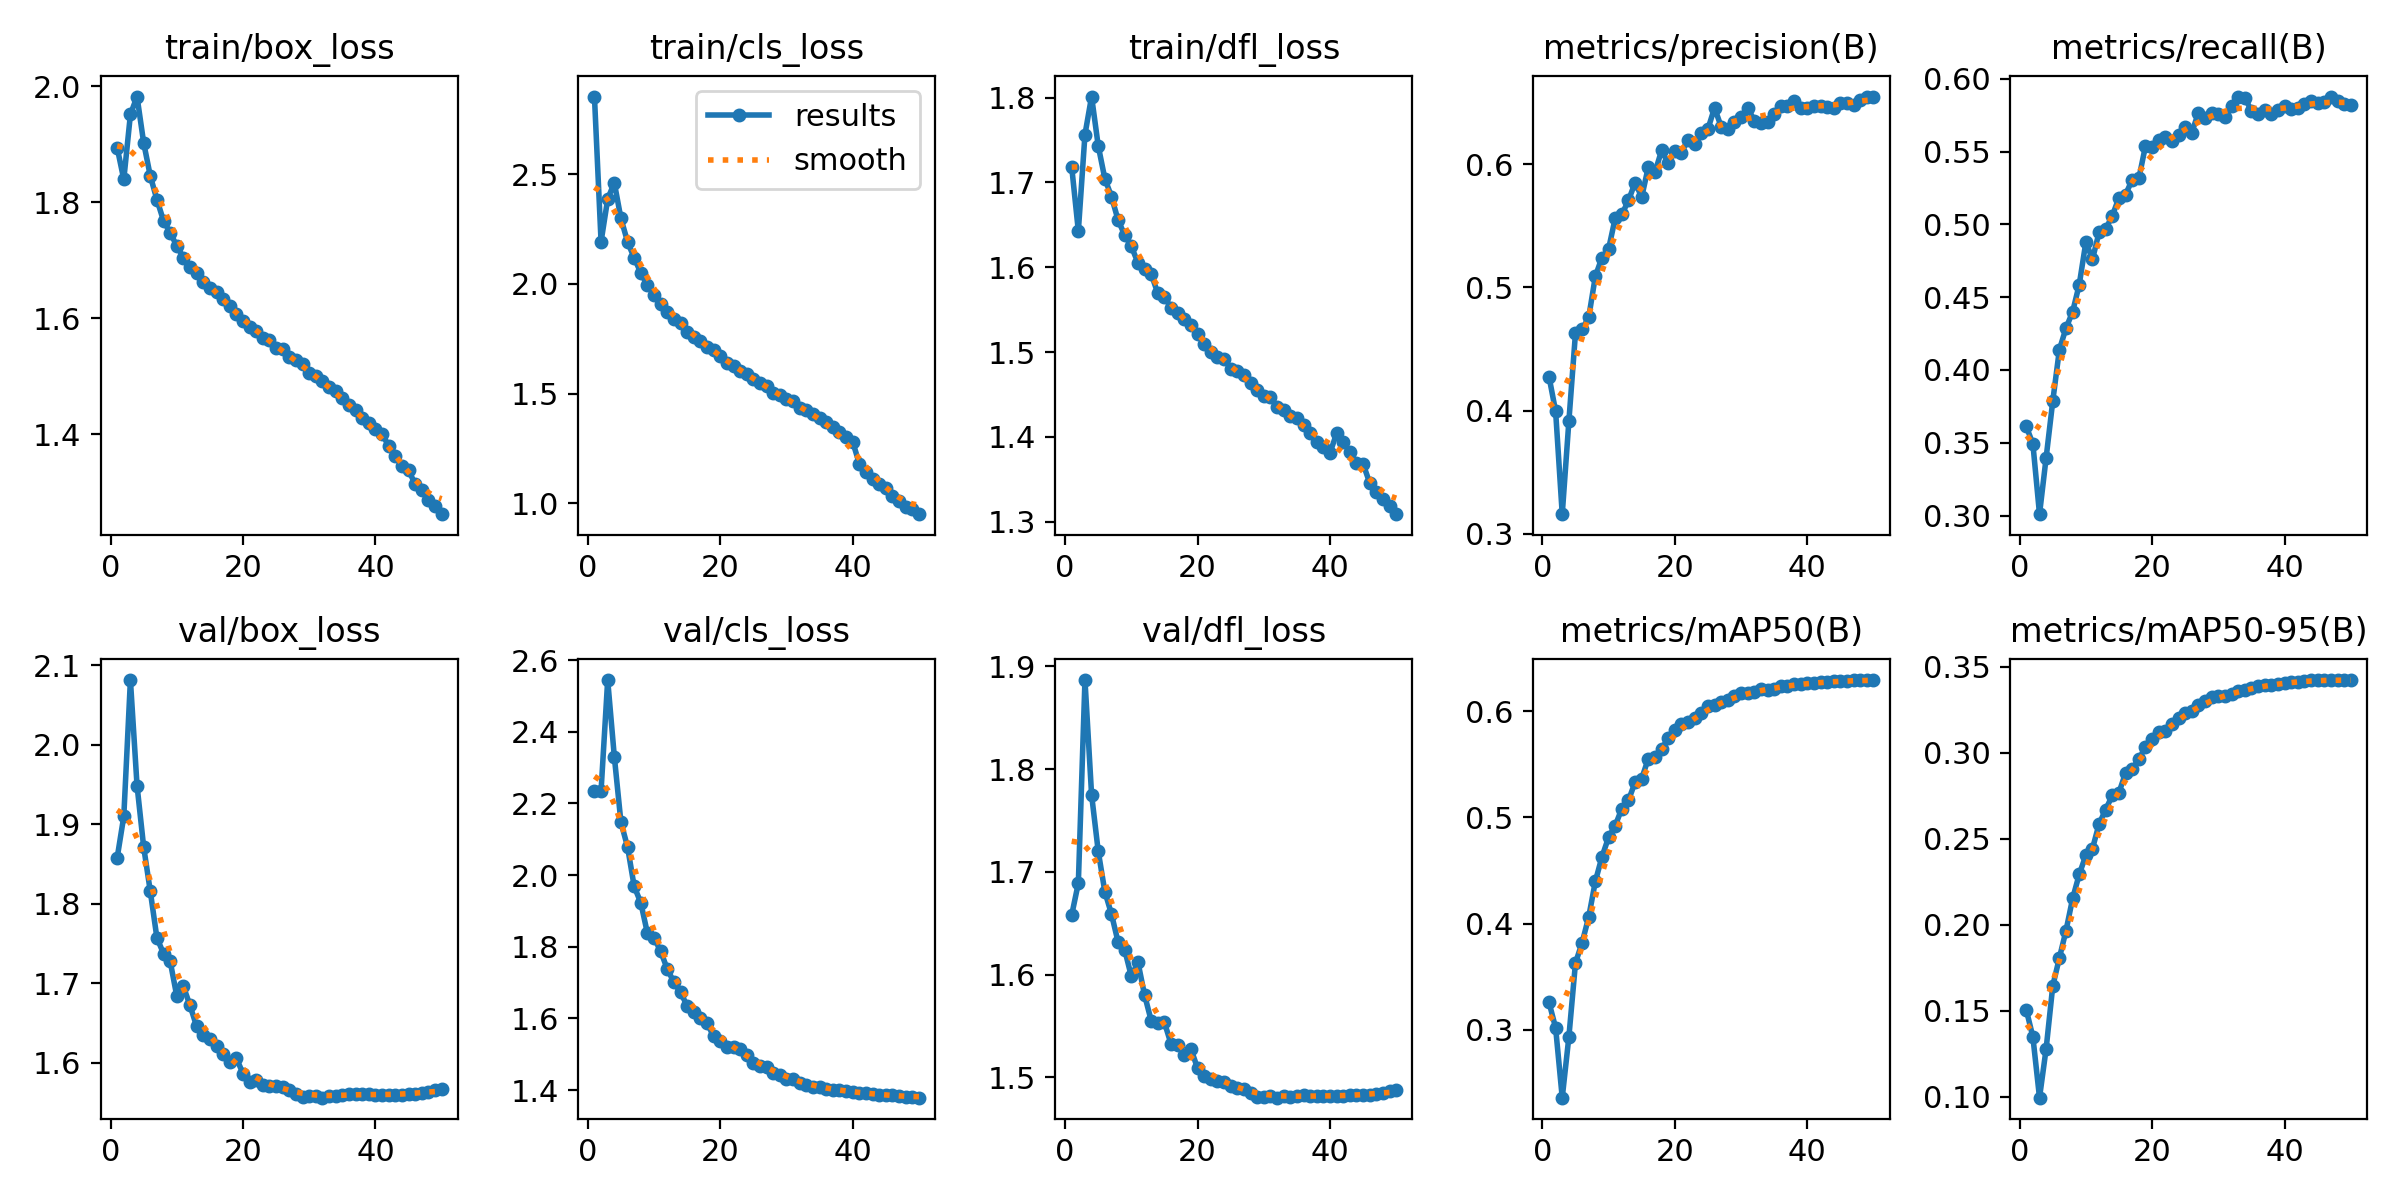

In [2]:
from IPython.display import Image, display

# 1. Training Results (Loss & Accuracy Curves)
print("--- Training Metrics (Include this in 'Model Performance') ---")
display(Image(filename='crackathon_runs/model_v1/results.png'))

--- Confusion Matrix (Shows classification errors) ---


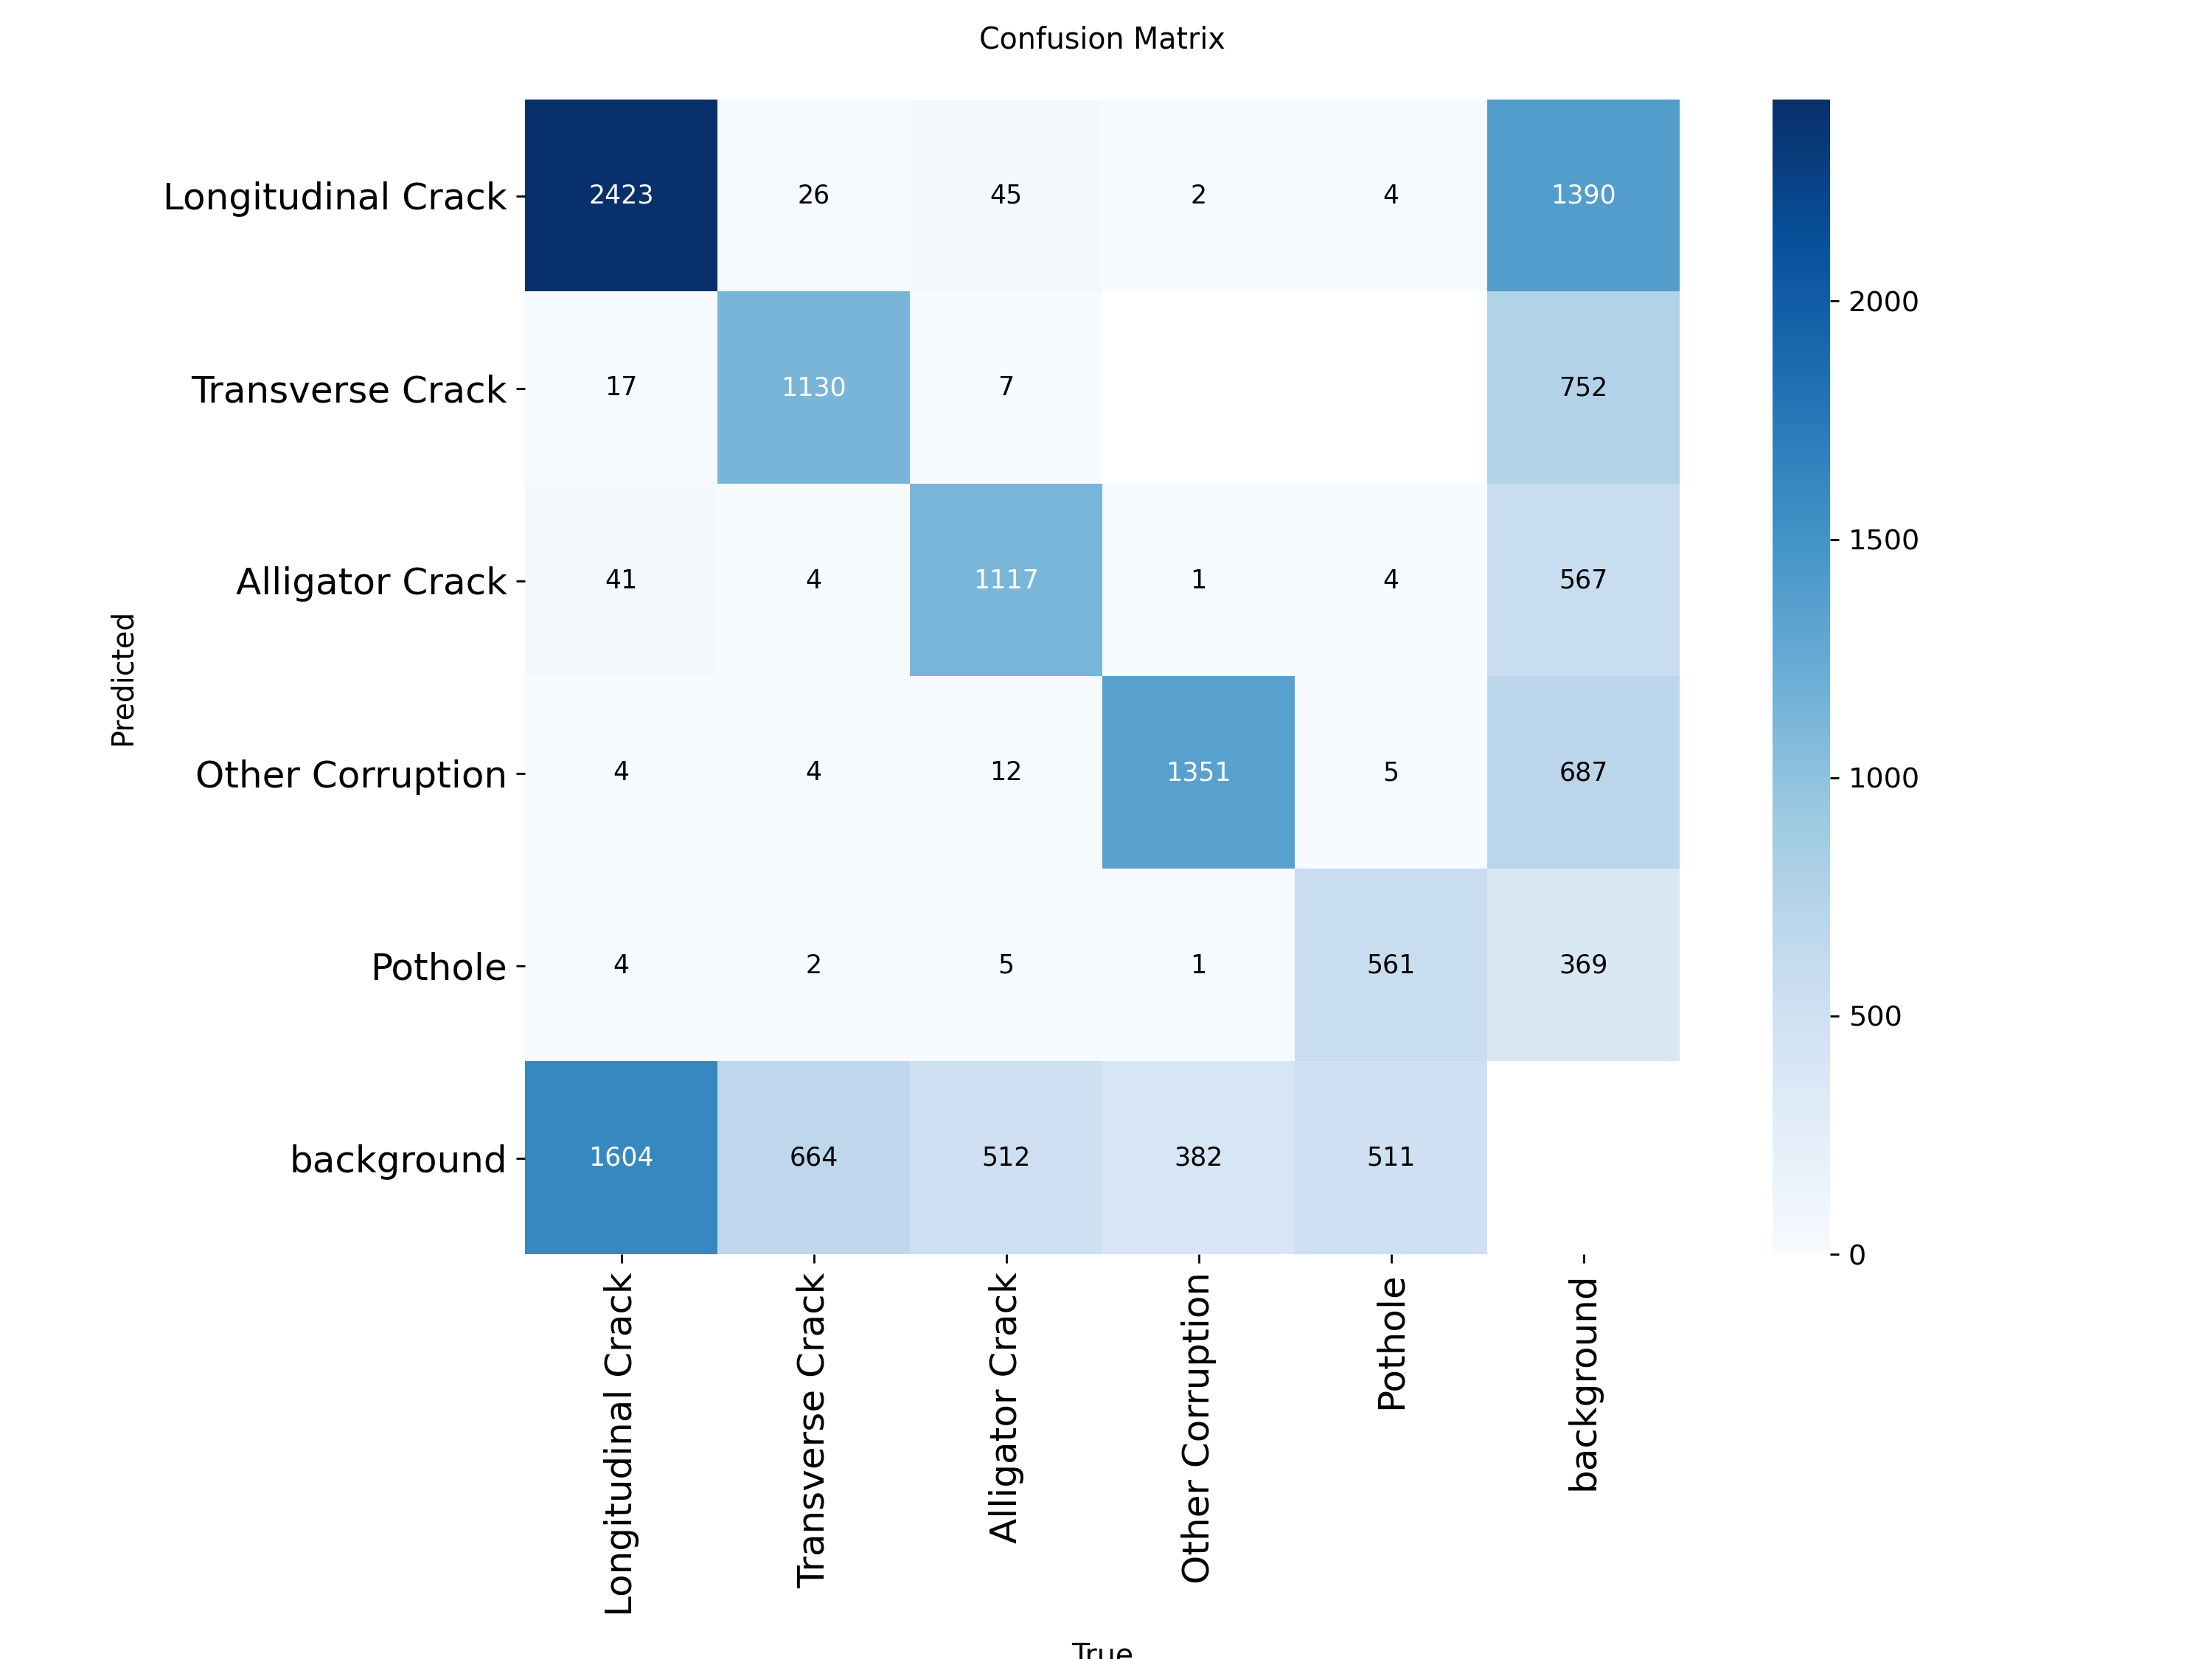

In [3]:
# 2. Confusion Matrix
print("--- Confusion Matrix (Shows classification errors) ---")
display(Image(filename='crackathon_runs/model_v1/confusion_matrix.png'))

--- Validation Batch Predictions ---


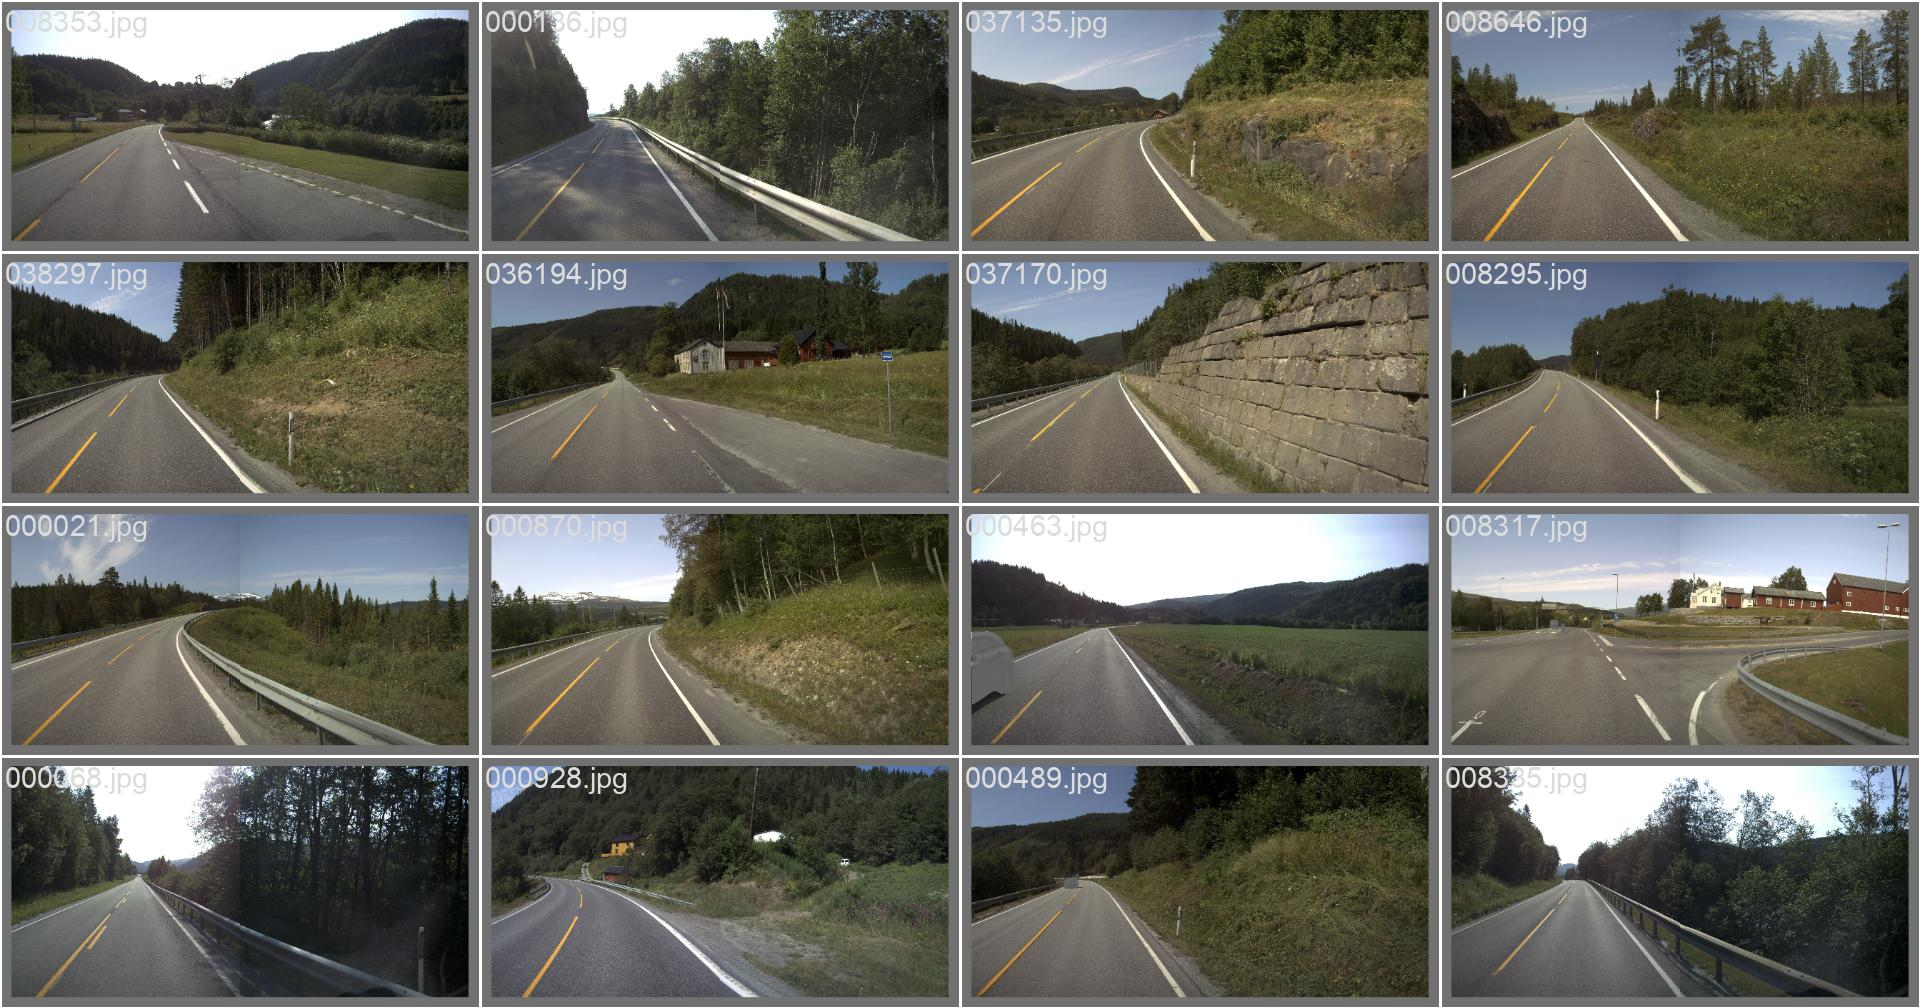

In [4]:
# 3. Sample Predictions (Visual Proof)
print("--- Validation Batch Predictions ---")
# val_batch0_pred.jpg shows the model's predictions on the first batch of validation data
display(Image(filename='crackathon_runs/model_v1/val_batch0_pred.jpg'))

In [5]:
import pandas as pd

# Load the results CSV
results_df = pd.read_csv('crackathon_runs/model_v1/results.csv')

# Clean up column names (remove extra spaces)
results_df.columns = results_df.columns.str.strip()

# Get the row with the best mAP50
best_epoch = results_df.loc[results_df['metrics/mAP50(B)'].idxmax()]

print("--- FINAL METRICS FOR REPORT ---")
print(f"Best Epoch: {int(best_epoch['epoch'])}")
print(f"mAP@50 (Accuracy): {best_epoch['metrics/mAP50(B)'] * 100:.2f}%")
print(f"Precision:         {best_epoch['metrics/precision(B)'] * 100:.2f}%")
print(f"Recall:            {best_epoch['metrics/recall(B)'] * 100:.2f}%")

--- FINAL METRICS FOR REPORT ---
Best Epoch: 50
mAP@50 (Accuracy): 62.91%
Precision:         65.41%
Recall:            58.22%


In [1]:
import os
import shutil
from ultralytics import YOLO

# --- PATHS ---
dataset_root = '/teamspace/studios/this_studio/.cache/kagglehub/datasets/anulayakhare/crackathon-data/versions/1/randomized_dataset'
best_model_path = 'crackathon_runs/model_v1/weights/best.pt'
test_images_path = os.path.join(dataset_root, 'test', 'images')
submission_folder = 'predictions'

# --- 1. VERIFY IMAGES ---
print(f"Checking {test_images_path}...")
test_files = [f for f in os.listdir(test_images_path) if f.endswith(('.jpg', '.png'))]
print(f"Found {len(test_files)} images to process.")

if len(test_files) == 0:
    print("❌ ERROR: No images found! Check the path.")
else:
    # --- 2. RUN INFERENCE ---
    print(f"Loading model...")
    model = YOLO(best_model_path)

    print("Starting Inference (This may take 2-5 minutes)...")
    
    # Run in stream mode
    results_generator = model.predict(
        source=test_images_path,
        save_txt=True,
        save_conf=True, 
        conf=0.25,        
        iou=0.45,         
        project='runs/detect',
        name='inference_run',
        exist_ok=True,
        stream=True,
        verbose=False
    )

    # Process manually and print status every 100 images
    count = 0
    for result in results_generator:
        count += 1
        if count % 100 == 0:
            print(f"Processed {count} / {len(test_files)} images...")

    print("Inference Complete!")

    # --- 3. FORMATTING ---
    print("Formatting submission files...")
    yolo_output_dir = 'runs/detect/inference_run/labels'

    if os.path.exists(submission_folder):
        shutil.rmtree(submission_folder)
    os.makedirs(submission_folder)

    for image_file in test_files:
        base_name = os.path.splitext(image_file)[0]
        txt_name = base_name + ".txt"
        
        src_txt = os.path.join(yolo_output_dir, txt_name)
        dst_txt = os.path.join(submission_folder, txt_name)
        
        if os.path.exists(src_txt):
            shutil.copy(src_txt, dst_txt)
        else:
            with open(dst_txt, 'w') as f:
                pass 

    # --- 4. ZIP ---
    print("Zipping...")
    shutil.make_archive('submission', 'zip', submission_folder)
    print("\n✅ DONE! Download 'submission.zip' now.")

Checking /teamspace/studios/this_studio/.cache/kagglehub/datasets/anulayakhare/crackathon-data/versions/1/randomized_dataset/test/images...
Found 6000 images to process.
Loading model...
Starting Inference (This may take 2-5 minutes)...
Processed 100 / 6000 images...
Processed 200 / 6000 images...
Processed 300 / 6000 images...
Processed 400 / 6000 images...
Processed 500 / 6000 images...
Processed 600 / 6000 images...
Processed 700 / 6000 images...
Processed 800 / 6000 images...
Processed 900 / 6000 images...
Processed 1000 / 6000 images...
Processed 1100 / 6000 images...
Processed 1200 / 6000 images...
Processed 1300 / 6000 images...
Processed 1400 / 6000 images...
Processed 1500 / 6000 images...
Processed 1600 / 6000 images...
Processed 1700 / 6000 images...
Processed 1800 / 6000 images...
Processed 1900 / 6000 images...
Processed 2000 / 6000 images...
Processed 2100 / 6000 images...
Processed 2200 / 6000 images...
Processed 2300 / 6000 images...
Processed 2400 / 6000 images...
Proc

In [7]:
import os

# 1. Create the folder (Python way is safer than !mkdir)
os.makedirs("Crackathon_Submission", exist_ok=True)

# 2. Enter the folder (Must use %cd, not !cd)
%cd Crackathon_Submission

# 3. Create the .gitignore file using shell commands
!echo "__pycache__/" > .gitignore
!echo ".ipynb_checkpoints/" >> .gitignore
!echo "runs/" >> .gitignore
!echo "dataset/" >> .gitignore
!echo "*.zip" >> .gitignore

# 4. Create the requirements.txt file
!echo "ultralytics==8.3.0" > requirements.txt
!echo "pandas" >> requirements.txt
!echo "tqdm" >> requirements.txt
!echo "kagglehub" >> requirements.txt

print("✅ Folder setup complete. You are now inside 'Crackathon_Submission'")

/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/teamspace/studios/this_studio/Crackathon_Submission
✅ Folder setup complete. You are now inside 'Crackathon_Submission'


In [8]:
import shutil

# Copy the best model
# Adjust the source path if your 'runs' folder is somewhere else
src_model = "../crackathon_runs/model_v1/weights/best.pt"
dst_model = "road_damage_model.pt"

if os.path.exists(src_model):
    shutil.copy(src_model, dst_model)
    print(f"✅ Copied model to {dst_model}")
else:
    print("❌ Error: Could not find best.pt. Check your path.")

# (Optional) Save the current notebook as a .py script or manually upload the .ipynb later

✅ Copied model to road_damage_model.pt
